In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [2]:
# test = pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')
test=pd.read_csv('E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [3]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

/home/atif/anaconda3/envs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [4]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [6]:
print(test_new.shape) #ROWS, COLUMNS

(25000, 4223)


In [7]:
test_new = test_new.set_index('dateTime') # make dataTime column as index of the dataframe test_new

In [8]:
univariate_column_label=['DEWIHOBT9_I0','AEDAHO_T9_V2','AEWIHO_T9AV2']

In [9]:
size_column = len(univariate_column_label)
print(size_column)

3


In [10]:
univariate_data=test_new.iloc[2000:7000][univariate_column_label]
univariate_data=univariate_data.loc[::-1]
print(univariate_data.head())

                     DEWIHOBT9_I0  AEDAHO_T9_V2  AEWIHO_T9AV2
dateTime                                                     
2019-04-06 00:21:00         100.0     72.427071     76.598087
2019-04-06 00:22:00         100.0     71.620643     76.358689
2019-04-06 00:23:00         100.0     70.606738     77.241097
2019-04-06 00:24:00         100.0     70.531626     77.062413
2019-04-06 00:25:00         100.0     70.692115     76.297974


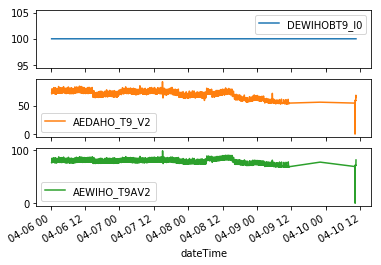

In [11]:
ax = univariate_data.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,10)
# plt.savefig('E:/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/images_from_training/multivariate_data_regression.png')
# plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [12]:
zero_index=[]
zero_index=np.array(zero_index)
for index, value in univariate_data.iterrows():
    for i , v in enumerate(value):
        if i == 0  and v == 0.0:
#             print('index: ',index)
            zero_index=np.append(zero_index,index)

print('size of zero_index: ',zero_index.size)

size of zero_index:  0


In [13]:
if zero_index.size > 0:
    univariate_data_modify = univariate_data.drop(zero_index,axis=0) # axis= 0 means row indiated. 1 means column indicated
else:
    univariate_data_modify = univariate_data

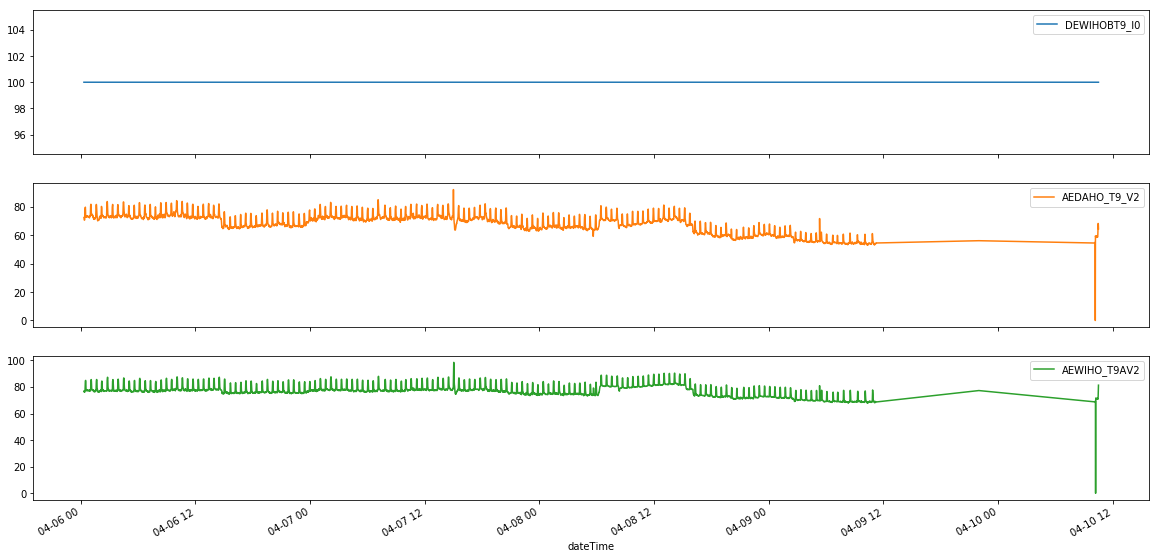

In [14]:
bx = univariate_data_modify.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [15]:
univariate_data_1= univariate_data_modify.drop(['DEWIHOBT9_I0','AEWIHO_T9AV2'], axis=1)
univariate_data_2= univariate_data_modify.drop(['DEWIHOBT9_I0','AEDAHO_T9_V2'], axis=1)

In [16]:
from numpy import nan
univariate_data_drop_zero_1 = univariate_data_1.replace(0,nan)
univariate_data_drop_zero_1 = univariate_data_drop_zero_1.dropna(how='any',axis=0)

univariate_data_drop_zero_2 = univariate_data_2.replace(0,nan)
univariate_data_drop_zero_2 = univariate_data_drop_zero_2.dropna(how='any',axis=0)

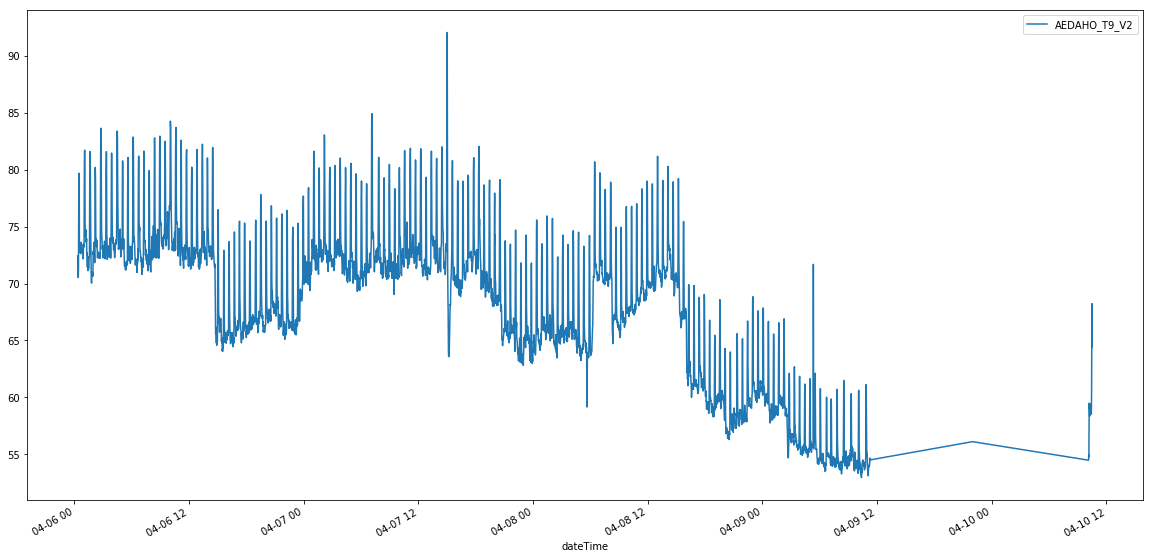

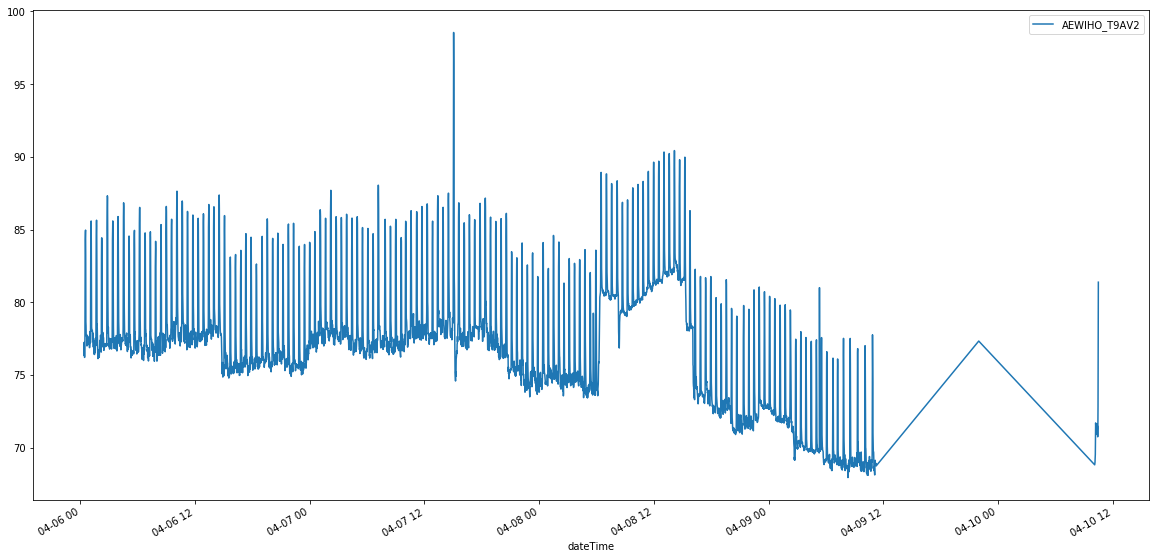

In [17]:
cx = univariate_data_drop_zero_1.plot()
dx = univariate_data_drop_zero_2.plot()
# plt.legend(loc='upper left')
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [5]:
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [4]:
fbprophet.__version__

NameError: name 'fbprophet' is not defined

In [4]:
import distutils
print(distutils.__file__)

C:\Users\atif\Anaconda3\lib\distutils\__init__.py


In [5]:
import matplotlib

In [6]:
matplotlib.__version__

'3.0.2'